# Module 1: Machine Learning Fundamentals

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/NabKh/ML-for-Materials-Science/blob/main/Tutorial-07-ML-Discovery/notebooks/01_ml_fundamentals.ipynb)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/NabKh/ML-for-Materials-Science/main?labpath=Tutorial-07-ML-Discovery/notebooks/01_ml_fundamentals.ipynb)

---

## 🎯 Learning Objectives

By the end of this module, you will be able to:

1. **Explain** what machine learning is and why it's transforming materials science
2. **Distinguish** between supervised and unsupervised learning
3. **Understand** the bias-variance tradeoff and overfitting
4. **Apply** cross-validation to evaluate models properly
5. **Recognize** common pitfalls in ML for materials

---

**⏱️ Estimated time: 45 minutes**

**📚 Difficulty: 🟢 Beginner**

## 📦 Setup

First, let's import the libraries we'll need and set up our environment.

In [1]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Interactive widgets
import ipywidgets as widgets
from IPython.display import display, HTML, Markdown

# Scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Plotting style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# For reproducibility
np.random.seed(42)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


---

## 1. What is Machine Learning?

### 📖 Theory

<div style="background: linear-gradient(135deg, #1e293b 0%, #0f172a 100%); padding: 20px; border-radius: 10px; border-left: 4px solid #6366f1;">

**Machine Learning (ML)** is a branch of artificial intelligence that enables computers to learn patterns from data without being explicitly programmed.

Instead of writing rules like:
```
IF electronegativity_diff > 2.0 AND ionic_radius_ratio < 0.5 THEN material = "ionic"
```

We show the algorithm many examples and let it discover the patterns:
```
model.fit(features, labels)  # Learn from data
prediction = model.predict(new_material)  # Apply learned patterns
```

</div>

### Why ML for Materials Science?

| Traditional Approach | ML Approach |
|---------------------|-------------|
| Run DFT calculation (~hours/days) | Predict in milliseconds |
| Expert knowledge required | Learn from existing data |
| One material at a time | Screen millions of candidates |
| Limited to known physics | Discover hidden patterns |

### 🎮 Interactive: The ML Paradigm Shift

Let's visualize how ML differs from traditional approaches.

In [ ]:
# Create a professional visualization of the ML paradigm
import os
os.makedirs('figures', exist_ok=True)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), facecolor='#0f172a')

# Color palette - professional and accessible
colors = {
    'cyan': '#06b6d4',
    'purple': '#8b5cf6', 
    'pink': '#ec4899',
    'green': '#10b981',
    'orange': '#f59e0b',
    'text': '#f1f5f9',
    'subtext': '#94a3b8',
    'bg': '#1e293b'
}

# Traditional approach
ax1 = axes[0]
ax1.set_facecolor('#0f172a')
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)
ax1.set_title('Traditional: Physics-Based Rules', fontsize=16, fontweight='bold', 
              color=colors['text'], pad=20)

from matplotlib.patches import FancyBboxPatch, FancyArrowPatch, ConnectionPatch

# Boxes for traditional approach - better spacing
boxes_trad = [
    (0.5, 4, 'Material\nStructure', colors['cyan']),
    (3.8, 4, 'Physics\nEquations', colors['pink']),
    (7.1, 4, 'Property', colors['green']),
]

for x, y, text, color in boxes_trad:
    box = FancyBboxPatch((x, y), 2.2, 2.5, boxstyle="round,rounding_size=0.3", 
                         facecolor=color, alpha=0.2, edgecolor=color, linewidth=2.5)
    ax1.add_patch(box)
    ax1.text(x+1.1, y+1.25, text, ha='center', va='center', fontsize=12, 
             fontweight='bold', color=colors['text'])

# Arrows with labels
arrow_style = dict(arrowstyle='-|>', color=colors['subtext'], lw=2.5, 
                   mutation_scale=15, connectionstyle='arc3,rad=0')
ax1.annotate('', xy=(3.6, 5.25), xytext=(2.9, 5.25), arrowprops=arrow_style)
ax1.annotate('', xy=(6.9, 5.25), xytext=(6.2, 5.25), arrowprops=arrow_style)

# Info box at bottom
info_box = FancyBboxPatch((1.5, 0.8), 7, 2, boxstyle="round,rounding_size=0.2",
                          facecolor=colors['bg'], alpha=0.8, edgecolor=colors['subtext'], 
                          linewidth=1.5, linestyle='--')
ax1.add_patch(info_box)
ax1.text(5, 1.8, 'Hours to Days per material\nExpert knowledge required', 
         ha='center', va='center', fontsize=11, color=colors['subtext'], 
         style='italic', linespacing=1.5)

ax1.axis('off')

# ML approach
ax2 = axes[1]
ax2.set_facecolor('#0f172a')
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 10)
ax2.set_title('ML: Data-Driven Learning', fontsize=16, fontweight='bold',
              color=colors['text'], pad=20)

# Boxes for ML approach - reorganized layout
boxes_ml = [
    (0.3, 5.5, 'Training\nData', colors['cyan']),
    (3.6, 5.5, 'ML\nModel', colors['purple']),
    (6.9, 5.5, 'New\nMaterial', colors['orange']),
    (6.9, 2, 'Prediction', colors['green']),
]

for x, y, text, color in boxes_ml:
    box = FancyBboxPatch((x, y), 2.2, 2.5, boxstyle="round,rounding_size=0.3", 
                         facecolor=color, alpha=0.2, edgecolor=color, linewidth=2.5)
    ax2.add_patch(box)
    ax2.text(x+1.1, y+1.25, text, ha='center', va='center', fontsize=12, 
             fontweight='bold', color=colors['text'])

# Arrows with labels
ax2.annotate('', xy=(3.4, 6.75), xytext=(2.7, 6.75), arrowprops=arrow_style)
ax2.text(3.05, 7.5, 'Learn', fontsize=10, color=colors['cyan'], ha='center', fontweight='bold')

ax2.annotate('', xy=(6.7, 6.75), xytext=(6.0, 6.75), arrowprops=arrow_style)
ax2.text(6.35, 7.5, 'Apply', fontsize=10, color=colors['orange'], ha='center', fontweight='bold')

ax2.annotate('', xy=(8, 5.3), xytext=(8, 4.7), arrowprops=arrow_style)
ax2.text(8.8, 5, 'Predict', fontsize=10, color=colors['green'], ha='center', fontweight='bold')

# Info box at bottom
info_box2 = FancyBboxPatch((1.5, 0.3), 7, 1.5, boxstyle="round,rounding_size=0.2",
                           facecolor=colors['bg'], alpha=0.8, edgecolor=colors['subtext'], 
                           linewidth=1.5, linestyle='--')
ax2.add_patch(info_box2)
ax2.text(5, 1.05, 'Milliseconds per material  |  Learn from existing databases', 
         ha='center', va='center', fontsize=11, color=colors['subtext'], style='italic')

ax2.axis('off')

plt.tight_layout()
plt.savefig('figures/01_ml_paradigm.png', dpi=200, bbox_inches='tight', 
            facecolor='#0f172a', edgecolor='none')
plt.show()

print("Figure saved to figures/01_ml_paradigm.png")

---

## 2. Supervised vs Unsupervised Learning

### 📖 Theory

<div style="background: linear-gradient(135deg, #1e293b 0%, #0f172a 100%); padding: 20px; border-radius: 10px; border-left: 4px solid #10b981;">

**Supervised Learning**: We have labeled data (input-output pairs)
- **Regression**: Predict continuous values (band gap = 1.2 eV)
- **Classification**: Predict categories (metal vs insulator)

**Unsupervised Learning**: We only have inputs, no labels
- **Clustering**: Group similar materials together
- **Dimensionality Reduction**: Visualize high-D data

</div>

In [ ]:
# Professional visualization of supervised vs unsupervised learning
fig, axes = plt.subplots(1, 2, figsize=(14, 6), facecolor='white')

# Color palette
colors = {
    'primary': '#0ea5e9',      # Sky blue
    'secondary': '#ec4899',    # Pink
    'tertiary': '#10b981',     # Green
    'accent': '#f59e0b',       # Orange
    'text': '#1e293b',
    'light': '#f1f5f9'
}

# Supervised: Regression example
ax1 = axes[0]
np.random.seed(42)
X_sup = np.random.uniform(0, 10, 50)
y_sup = 2 * X_sup + 1 + np.random.normal(0, 2, 50)

# Plot with better styling
ax1.scatter(X_sup, y_sup, c=colors['primary'], s=100, alpha=0.7, 
           edgecolors='white', linewidth=1.5, zorder=3, label='Data points')
ax1.plot([0, 10], [1, 21], color=colors['accent'], linewidth=3, 
         linestyle='--', label='Learned relationship', zorder=2)

ax1.set_xlabel('Feature X (e.g., electronegativity)', fontsize=12, color=colors['text'])
ax1.set_ylabel('Target y (e.g., band gap in eV)', fontsize=12, color=colors['text'])
ax1.set_title('Supervised Learning: Regression', fontsize=14, fontweight='bold', 
              color=colors['text'], pad=15)
ax1.legend(loc='upper left', framealpha=0.95, fontsize=10)

# Clean annotation - no dark overlapping box
ax1.annotate('Each point has a\nknown target label (y)', 
             xy=(7, 8), fontsize=11, color=colors['text'],
             bbox=dict(boxstyle='round,pad=0.5', facecolor=colors['light'], 
                      edgecolor=colors['primary'], linewidth=2, alpha=0.95),
             ha='center')

ax1.set_xlim(-0.5, 11)
ax1.set_ylim(-2, 24)
ax1.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax1.set_facecolor('white')

# Unsupervised: Clustering example
ax2 = axes[1]
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X_unsup, _ = make_blobs(n_samples=100, centers=3, cluster_std=0.8, random_state=42)

# Cluster the data
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_unsup)

# Plot with distinct colors
cluster_colors = [colors['primary'], colors['secondary'], colors['tertiary']]
cluster_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']

for i in range(3):
    mask = clusters == i
    ax2.scatter(X_unsup[mask, 0], X_unsup[mask, 1], c=cluster_colors[i], s=100, alpha=0.7,
               edgecolors='white', linewidth=1.5, label=cluster_labels[i], zorder=3)

ax2.set_xlabel('Feature 1 (e.g., atomic radius)', fontsize=12, color=colors['text'])
ax2.set_ylabel('Feature 2 (e.g., valence electrons)', fontsize=12, color=colors['text'])
ax2.set_title('Unsupervised Learning: Clustering', fontsize=14, fontweight='bold',
              color=colors['text'], pad=15)
ax2.legend(loc='upper right', framealpha=0.95, fontsize=10)

# Clean annotation - no dark overlapping box
ax2.annotate('No labels provided!\nAlgorithm discovers groups', 
             xy=(-4, -6), fontsize=11, color=colors['text'],
             bbox=dict(boxstyle='round,pad=0.5', facecolor=colors['light'], 
                      edgecolor=colors['secondary'], linewidth=2, alpha=0.95),
             ha='center')

ax2.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax2.set_facecolor('white')

plt.tight_layout()
plt.savefig('figures/01_supervised_vs_unsupervised.png', dpi=200, bbox_inches='tight',
            facecolor='white', edgecolor='none')
plt.show()

print("Figure saved to figures/01_supervised_vs_unsupervised.png")

### 🎮 Interactive Quiz: Supervised or Unsupervised?

Test your understanding! For each scenario, decide if it's supervised or unsupervised learning.

In [4]:
# Quiz widget
quiz_data = [
    {
        "question": "Predicting formation energy from crystal structure",
        "answer": "Supervised",
        "explanation": "We have labeled data: each structure has a known formation energy from DFT."
    },
    {
        "question": "Grouping perovskites by structural similarity",
        "answer": "Unsupervised",
        "explanation": "We're finding natural groupings without predefined labels."
    },
    {
        "question": "Classifying materials as metal or insulator",
        "answer": "Supervised",
        "explanation": "Classification with known labels (metal=0, insulator=1)."
    },
    {
        "question": "Reducing 100 features to 2D for visualization",
        "answer": "Unsupervised",
        "explanation": "Dimensionality reduction doesn't use labels."
    }
]

def create_quiz():
    output = widgets.Output()
    
    for i, q in enumerate(quiz_data):
        print(f"\n❓ Question {i+1}: {q['question']}")
        
        def check_answer(btn, q=q):
            with output:
                output.clear_output()
                if btn.description == q['answer']:
                    print(f"✅ Correct! {q['explanation']}")
                else:
                    print(f"❌ Not quite. The answer is {q['answer']}. {q['explanation']}")
        
        btn_sup = widgets.Button(description="Supervised", button_style='info')
        btn_unsup = widgets.Button(description="Unsupervised", button_style='warning')
        
        btn_sup.on_click(check_answer)
        btn_unsup.on_click(check_answer)
        
        display(widgets.HBox([btn_sup, btn_unsup]))
    
    display(output)

create_quiz()


❓ Question 1: Predicting formation energy from crystal structure



❓ Question 2: Grouping perovskites by structural similarity



❓ Question 3: Classifying materials as metal or insulator



❓ Question 4: Reducing 100 features to 2D for visualization


Output()

---

## 3. The Bias-Variance Tradeoff

### 📖 Theory

<div style="background: linear-gradient(135deg, #1e293b 0%, #0f172a 100%); padding: 20px; border-radius: 10px; border-left: 4px solid #f59e0b;">

Every ML model has two types of errors:

**Bias**: Error from oversimplified assumptions
- High bias → **Underfitting** (model too simple)
- Example: Using linear regression for a quadratic relationship

**Variance**: Error from sensitivity to training data fluctuations
- High variance → **Overfitting** (model too complex)
- Example: Model memorizes training data, fails on new data

**Total Error = Bias² + Variance + Irreducible Noise**

</div>

The key insight: **There's a sweet spot** between too simple and too complex!

### 🎮 Interactive: Explore the Bias-Variance Tradeoff

Use the slider to change the model complexity (polynomial degree) and see how it affects fitting.

In [5]:
# Generate synthetic data with a true quadratic relationship
np.random.seed(42)
X_data = np.linspace(0, 1, 30).reshape(-1, 1)
y_true = 0.5 + 2*X_data.flatten() - 3*X_data.flatten()**2  # True relationship
y_data = y_true + np.random.normal(0, 0.15, 30)  # Add noise

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.3, random_state=42
)

def plot_bias_variance(degree):
    """Plot the effect of polynomial degree on bias and variance."""
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Fit model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predictions
    X_plot = np.linspace(0, 1, 100).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_pred_plot = model.predict(X_plot_poly)
    
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calculate errors
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Left plot: Data and fit
    ax1 = axes[0]
    ax1.scatter(X_train, y_train, c='#22d3ee', s=100, label='Training data', 
                edgecolors='white', linewidth=1.5, zorder=3)
    ax1.scatter(X_test, y_test, c='#f472b6', s=100, label='Test data', 
                edgecolors='white', linewidth=1.5, marker='s', zorder=3)
    ax1.plot(X_plot, y_pred_plot, 'yellow', linewidth=2.5, label=f'Degree {degree} fit', zorder=2)
    ax1.plot(X_plot.flatten(), 0.5 + 2*X_plot.flatten() - 3*X_plot.flatten()**2, 
             '--', color='#10b981', linewidth=2, label='True relationship', alpha=0.7)
    
    ax1.set_xlabel('Feature X', fontsize=12)
    ax1.set_ylabel('Target y', fontsize=12)
    ax1.set_title(f'Polynomial Degree = {degree}', fontsize=14, fontweight='bold')
    ax1.legend(loc='upper right')
    ax1.set_ylim(-1, 1.5)
    
    # Determine status
    if degree == 1:
        status = "⚠️ UNDERFITTING (High Bias)"
        status_color = '#f59e0b'
    elif degree == 2:
        status = "✅ GOOD FIT (Balanced)"
        status_color = '#10b981'
    elif degree <= 4:
        status = "✅ Acceptable"
        status_color = '#10b981'
    else:
        status = "⚠️ OVERFITTING (High Variance)"
        status_color = '#ef4444'
    
    ax1.text(0.5, -0.7, status, fontsize=14, fontweight='bold', 
             ha='center', color=status_color,
             bbox=dict(boxstyle='round', facecolor='#1e293b', edgecolor=status_color))
    
    # Right plot: Performance metrics
    ax2 = axes[1]
    metrics = ['Train RMSE', 'Test RMSE', 'Train R²', 'Test R²']
    values = [train_rmse, test_rmse, train_r2, test_r2]
    colors = ['#22d3ee', '#f472b6', '#22d3ee', '#f472b6']
    
    x_pos = np.arange(len(metrics))
    bars = ax2.bar(x_pos, values, color=colors, alpha=0.8, edgecolor='white', linewidth=1.5)
    
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(metrics, fontsize=11)
    ax2.set_ylabel('Value', fontsize=12)
    ax2.set_title('Model Performance', fontsize=14, fontweight='bold')
    
    # Add value labels
    for bar, val in zip(bars, values):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                f'{val:.3f}', ha='center', fontsize=11, fontweight='bold')
    
    # Add gap indicator
    gap = test_rmse - train_rmse
    gap_text = f"Train-Test Gap: {gap:.3f}"
    if gap > 0.1:
        gap_text += " (Overfitting!)" 
    ax2.text(0.5, 0.95, gap_text, transform=ax2.transAxes, fontsize=11,
             ha='center', bbox=dict(boxstyle='round', facecolor='#1e293b', edgecolor='#6366f1'))
    
    ax2.set_ylim(0, max(values) * 1.3)
    
    plt.tight_layout()
    plt.show()

# Create interactive widget
degree_slider = widgets.IntSlider(
    value=2,
    min=1,
    max=15,
    step=1,
    description='Degree:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='500px')
)

widgets.interact(plot_bias_variance, degree=degree_slider)

interactive(children=(IntSlider(value=2, description='Degree:', layout=Layout(width='500px'), max=15, min=1, s…

<function __main__.plot_bias_variance(degree)>

### 💡 Key Insight

<div style="background: rgba(16, 185, 129, 0.1); padding: 15px; border-radius: 10px; border-left: 4px solid #10b981;">

**What did you observe?**

- **Degree 1**: Model is too simple → High training AND test error (underfitting)
- **Degree 2**: Just right → Low training and test error (good generalization)
- **Degree 10+**: Model memorizes training data → Very low training error, HIGH test error (overfitting)

The **gap between training and test error** is a key indicator of overfitting!

</div>

---

## 4. Train/Test Split and Cross-Validation

### 📖 Theory

<div style="background: linear-gradient(135deg, #1e293b 0%, #0f172a 100%); padding: 20px; border-radius: 10px; border-left: 4px solid #6366f1;">

**Why split data?**

We need to evaluate how well our model generalizes to *unseen* data. If we train and test on the same data, we can't detect overfitting!

**Train/Test Split**: 
- Training set (~70-80%): Used to fit the model
- Test set (~20-30%): Used to evaluate final performance

**Cross-Validation (CV)**:
- More robust than single split
- Rotate which portion is the test set
- Get multiple performance estimates

</div>

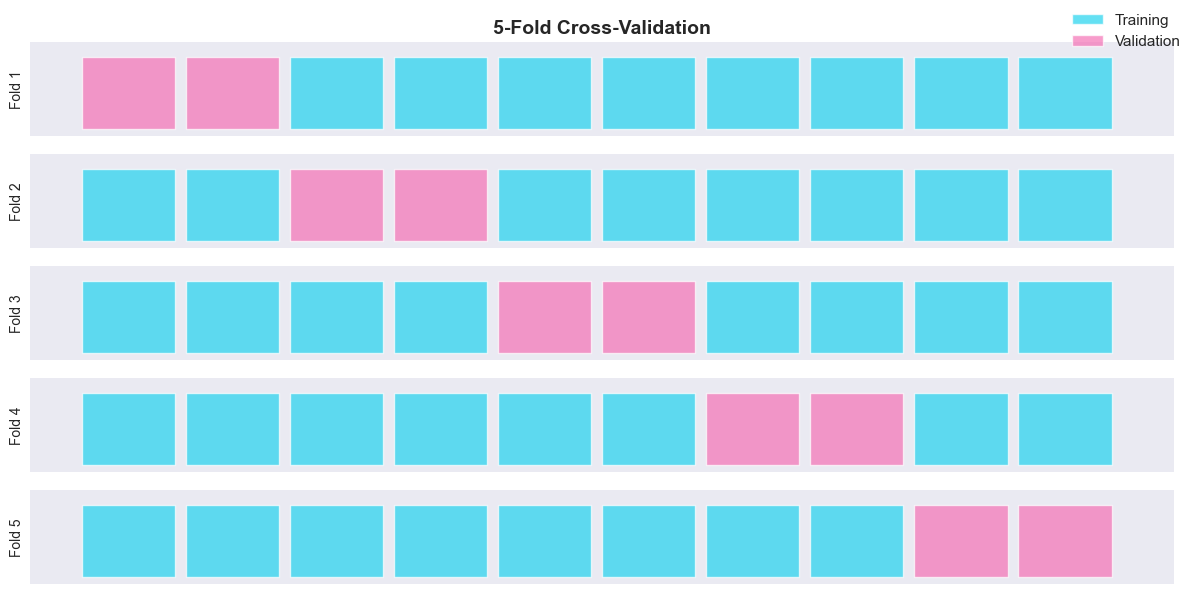


💡 Each fold uses a different portion as the validation set.
   The final score is the average across all folds.


In [6]:
# Visualize K-Fold Cross-Validation
fig, axes = plt.subplots(5, 1, figsize=(12, 6))

n_samples = 10
k_folds = 5

for fold in range(k_folds):
    ax = axes[fold]
    
    # Create visualization
    for i in range(n_samples):
        # Determine if this sample is in test set for this fold
        test_start = fold * (n_samples // k_folds)
        test_end = test_start + (n_samples // k_folds)
        
        if test_start <= i < test_end:
            color = '#f472b6'  # Test
            label = 'Test' if i == test_start else None
        else:
            color = '#22d3ee'  # Train
            label = 'Train' if i == 0 and fold == 0 else None
        
        rect = plt.Rectangle((i, 0), 0.9, 1, facecolor=color, alpha=0.7, edgecolor='white')
        ax.add_patch(rect)
    
    ax.set_xlim(-0.5, n_samples + 0.5)
    ax.set_ylim(-0.1, 1.2)
    ax.set_ylabel(f'Fold {fold+1}', fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

axes[0].set_title('5-Fold Cross-Validation', fontsize=14, fontweight='bold')

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#22d3ee', alpha=0.7, edgecolor='white', label='Training'),
    Patch(facecolor='#f472b6', alpha=0.7, edgecolor='white', label='Validation')
]
fig.legend(handles=legend_elements, loc='upper right', fontsize=11)

plt.tight_layout()
plt.savefig('figures/01_cross_validation.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💡 Each fold uses a different portion as the validation set.")
print("   The final score is the average across all folds.")

### 💻 Code Example: Proper Model Evaluation

In [7]:
# Generate some synthetic "materials" data
np.random.seed(42)
n_materials = 200

# Features: imagine these are material properties
electronegativity = np.random.uniform(1.5, 4.0, n_materials)
atomic_radius = np.random.uniform(0.5, 2.5, n_materials)
valence_electrons = np.random.randint(1, 8, n_materials)

# Target: band gap (synthetic relationship)
band_gap = (
    0.5 * electronegativity + 
    0.3 * atomic_radius - 
    0.1 * valence_electrons + 
    np.random.normal(0, 0.3, n_materials)
)

# Create feature matrix
X = np.column_stack([electronegativity, atomic_radius, valence_electrons])
y = band_gap

print(f"Dataset shape: {X.shape}")
print(f"Features: electronegativity, atomic_radius, valence_electrons")
print(f"Target: band_gap (synthetic)")

Dataset shape: (200, 3)
Features: electronegativity, atomic_radius, valence_electrons
Target: band_gap (synthetic)


In [8]:
# Method 1: Simple train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Method 1: Simple Train/Test Split")
print(f"  Training R²: {train_score:.4f}")
print(f"  Test R²:     {test_score:.4f}")
print(f"  Gap:         {train_score - test_score:.4f}")

Method 1: Simple Train/Test Split
  Training R²: 0.7206
  Test R²:     0.7183
  Gap:         0.0023


In [9]:
# Method 2: Cross-validation (more robust)
from sklearn.model_selection import cross_val_score

model = LinearRegression()
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("\nMethod 2: 5-Fold Cross-Validation")
print(f"  Fold scores: {cv_scores.round(4)}")
print(f"  Mean R²:     {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
print("\n✅ Cross-validation gives a more reliable estimate!")


Method 2: 5-Fold Cross-Validation
  Fold scores: [0.7206 0.6462 0.6873 0.7403 0.7584]
  Mean R²:     0.7106 ± 0.0399

✅ Cross-validation gives a more reliable estimate!


---

## 5. Common Pitfalls in ML for Materials

### ⚠️ Data Leakage

<div style="background: rgba(239, 68, 68, 0.1); padding: 15px; border-radius: 10px; border-left: 4px solid #ef4444;">

**Data leakage** occurs when information from the test set "leaks" into training.

**Materials-specific examples:**

1. **Duplicate structures**: Same material with slightly different DFT parameters
2. **Elemental leakage**: Training on Fe₂O₃, testing on Fe₃O₄ (they share elements!)
3. **Structural similarity**: Polymorphs of the same compound in train and test

**Solution**: Use grouping strategies (group by composition, structure type, etc.)

</div>

In [10]:
# Demonstrate data leakage with similar materials
print("⚠️ Example: Data Leakage in Materials")
print("="*50)

# Imagine we have these materials
materials = [
    "Fe2O3", "Fe3O4", "FeO",      # Iron oxides
    "TiO2", "Ti2O3",               # Titanium oxides  
    "ZnO", "ZnS",                  # Zinc compounds
    "Al2O3",                        # Alumina
]

print("\n❌ Bad split (random):")
print("   Train: Fe2O3, TiO2, ZnO, Fe3O4, Al2O3")
print("   Test:  FeO, Ti2O3, ZnS")
print("   Problem: Fe is in both train AND test!")

print("\n✅ Good split (grouped by element):")
print("   Train: Fe2O3, Fe3O4, FeO, TiO2, Ti2O3")
print("   Test:  ZnO, ZnS, Al2O3")
print("   No element overlap between train and test!")

⚠️ Example: Data Leakage in Materials

❌ Bad split (random):
   Train: Fe2O3, TiO2, ZnO, Fe3O4, Al2O3
   Test:  FeO, Ti2O3, ZnS
   Problem: Fe is in both train AND test!

✅ Good split (grouped by element):
   Train: Fe2O3, Fe3O4, FeO, TiO2, Ti2O3
   Test:  ZnO, ZnS, Al2O3
   No element overlap between train and test!


### ⚠️ Small Dataset Problems

<div style="background: rgba(245, 158, 11, 0.1); padding: 15px; border-radius: 10px; border-left: 4px solid #f59e0b;">

Materials datasets are often small compared to other ML domains:

| Domain | Typical Dataset Size |
|--------|---------------------|
| Image Recognition | Millions |
| NLP | Billions of words |
| **Materials Science** | **100s to 10,000s** |

**Implications:**
- Higher risk of overfitting
- More variance in model performance
- Feature selection becomes crucial

**Solutions:**
- Use cross-validation (not just train/test)
- Prefer simpler models
- Use regularization
- Transfer learning from larger databases

</div>

---

## 📝 Exercises

### Exercise 1: Identify the Learning Type

For each scenario, identify if it's:
- A) Supervised Regression
- B) Supervised Classification  
- C) Unsupervised Clustering
- D) Unsupervised Dimensionality Reduction

In [11]:
# Exercise 1: Fill in your answers
exercise_1 = {
    "Predicting melting point in Kelvin": "?",  # Your answer
    "Identifying if a crystal is cubic, tetragonal, or hexagonal": "?",  # Your answer
    "Finding natural groups in a dataset of 1000 alloys": "?",  # Your answer
    "Visualizing 50 features in 2D with t-SNE": "?",  # Your answer
}

print("Your answers:")
for question, answer in exercise_1.items():
    print(f"  {question}")
    print(f"  → {answer}\n")

Your answers:
  Predicting melting point in Kelvin
  → ?

  Identifying if a crystal is cubic, tetragonal, or hexagonal
  → ?

  Finding natural groups in a dataset of 1000 alloys
  → ?

  Visualizing 50 features in 2D with t-SNE
  → ?



### Exercise 2: Detect Overfitting

Given these model results, which ones show signs of overfitting?

In [12]:
# Exercise 2: Analyze these results
model_results = {
    "Model A": {"Train R²": 0.95, "Test R²": 0.93},
    "Model B": {"Train R²": 0.99, "Test R²": 0.45},
    "Model C": {"Train R²": 0.60, "Test R²": 0.58},
    "Model D": {"Train R²": 0.88, "Test R²": 0.70},
}

print("Analyze these models:")
print("="*50)
for name, scores in model_results.items():
    gap = scores["Train R²"] - scores["Test R²"]
    print(f"{name}: Train={scores['Train R²']:.2f}, Test={scores['Test R²']:.2f}, Gap={gap:.2f}")

print("\nQuestions:")
print("1. Which model(s) show overfitting?")
print("2. Which model(s) might be underfitting?")
print("3. Which model would you choose and why?")

# Write your analysis below:
# ...

Analyze these models:
Model A: Train=0.95, Test=0.93, Gap=0.02
Model B: Train=0.99, Test=0.45, Gap=0.54
Model C: Train=0.60, Test=0.58, Gap=0.02
Model D: Train=0.88, Test=0.70, Gap=0.18

Questions:
1. Which model(s) show overfitting?
2. Which model(s) might be underfitting?
3. Which model would you choose and why?


### Exercise 3: Implement Cross-Validation

Complete the code to compare Ridge regression with different regularization strengths.

In [13]:
# Exercise 3: Compare regularization strengths
from sklearn.linear_model import Ridge

# Different regularization strengths (alpha values)
alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

results = []

for alpha in alphas:
    # TODO: Create Ridge model with this alpha
    # model = Ridge(alpha=...)
    
    # TODO: Perform 5-fold cross-validation
    # cv_scores = cross_val_score(...)
    
    # TODO: Store mean and std of scores
    # results.append({...})
    pass

# Uncomment when you've completed the code:
# print("Alpha\t\tMean R²\t\tStd")
# for r in results:
#     print(f"{r['alpha']}\t\t{r['mean']:.4f}\t\t{r['std']:.4f}")

---

## ✅ Module Summary

### Key Takeaways

1. **ML learns patterns from data** instead of explicit programming
2. **Supervised learning** uses labeled data; **unsupervised** finds patterns without labels
3. **The bias-variance tradeoff** requires balancing model complexity
4. **Always use proper evaluation**: train/test split + cross-validation
5. **Watch out for data leakage** in materials datasets!

### What's Next?

In **Module 2: Data Foundation**, you'll learn to:
- Access the Materials Project database
- Clean and prepare materials data
- Create proper train/test splits for materials

---

**📚 Continue to Module 2:** [Data Foundation](02_data_foundation.ipynb)